# Census Income Project

## Importing the required libararies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Data Collection

In [3]:
#Importing the dataset
df1=pd.read_csv("Census data.csv")
df1.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-colege,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
#Checking the shape pf the dataset
df1.shape

(32560, 15)

There are 32560 rows and 15 columns

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We can see that target column has object datatype.

In [6]:
#Checking null values in the dataset
df1.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values present in the dataset

In [7]:
df1.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [8]:
#Replacing ? with nan values
df1=df1.replace(" ?",np.NaN)

In [9]:
#creating list of categorical colum having nan values
col1=["Workclass","Occupation","Native_country"]

In [10]:
#filling nan values with mode
for i in col1:
    df1[i].fillna(df1[i].mode()[0], inplace=True)

In [11]:
df1.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

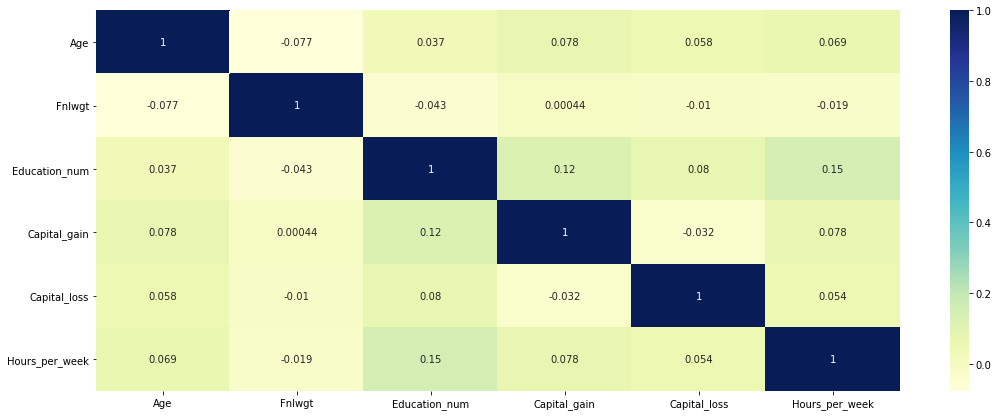

In [12]:
#Correlation via Heatmap
plt.figure(figsize=[18,7])
sns.heatmap(df1.corr(),cmap="YlGnBu", annot=True)

In [13]:
#Checking the correlation
df1.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


In [14]:
#Checking the values count in Income column
df1['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

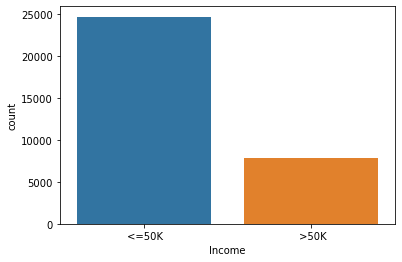

In [15]:
#Income distribution via counplot
sns.countplot(x='Income',data = df1)

In [16]:
#Encoding of target column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1["Income"]=le.fit_transform(df1["Income"])

<AxesSubplot:xlabel='Income', ylabel='count'>

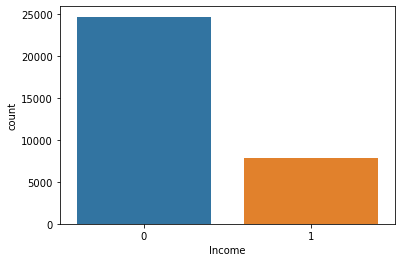

In [17]:
sns.countplot(x='Income',data = df1)

where <50K: 0 and >50K: 1.
        
We will use this encoded values in our further analysis

<AxesSubplot:xlabel='Income', ylabel='Age'>

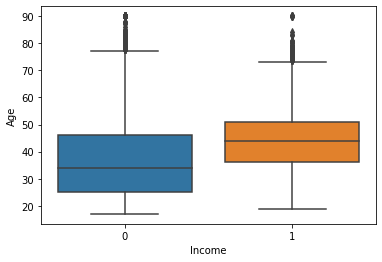

In [18]:
#Checking relationship between age and income
sns.boxplot(y='Age',x='Income',data=df1)

We can observe that people who are above age 45 have income more than 50K.

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

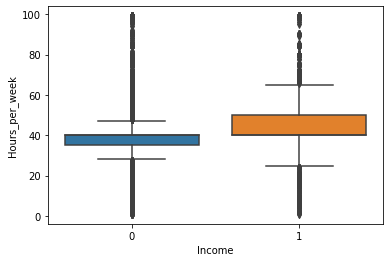

In [19]:
#Checking relationship between Hours_per_week and income
sns.boxplot(y='Hours_per_week',x='Income',data=df1)

We can observe that people who are working more hours i.e above 40 in a week have income more than 50K.
Here majority of people who has income more than 50K are working more hours in a week.

<AxesSubplot:xlabel='Sex', ylabel='count'>

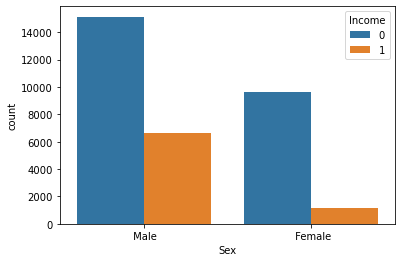

In [20]:
#Checking the income w.r.t to sex
sns.countplot(df1['Sex'],hue=df1['Income'])

We can observe the majority of the Males income are more than 50K as compare to females.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

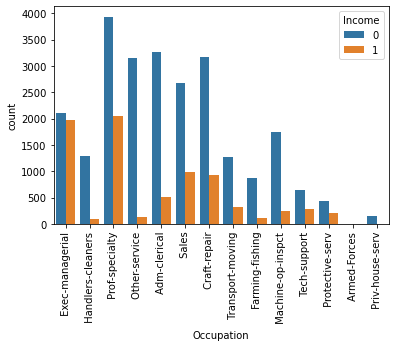

In [21]:
sns.countplot(df1['Occupation'],hue=df1['Income'])
plt.xticks(rotation=90)

We can observe that desnity of Prof-speciality peoples are more as compared to other occuation spcialised people.

Here majority of people are earning less than 50K but also some of them are earning greater than 50K which is high as comapred to other occupation specializsed people.

<AxesSubplot:xlabel='Education_num', ylabel='Income'>

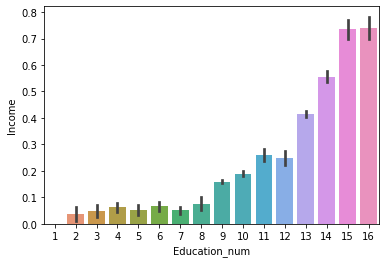

In [22]:
#Checking the relation betwenn education and income
sns.barplot(x="Education_num",y="Income",data=df1)

We can clearly observe that whcih ever has higher education_num also earning a good amount of money.

In [23]:
#Checking the unique values in the workclass column
df1['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked',
       ' Wifout-pay'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay'),
  Text(7, 0, ' Never-worked'),
  Text(8, 0, ' Wifout-pay')])

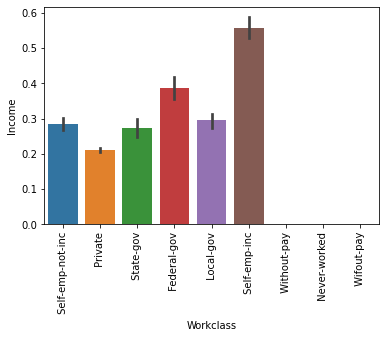

In [24]:
#Checking the realation b/w workclass and income
sns.barplot(df1["Workclass"],df1["Income"],data=df1)
plt.xticks(rotation=90)

It is clearly observable that people who are selfemplyed and has his own company are earning good amount of money as comapared to others.

In [25]:
#Checking the unique values in the education columns
df1['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-colege', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th', ' Some-college'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-colege'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th'),
  Text(16, 0, ' Some-college')])

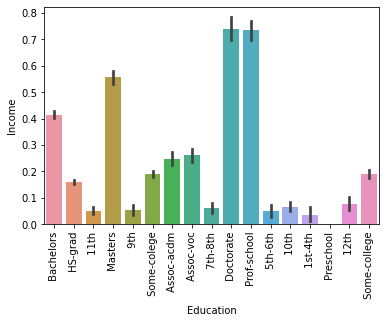

In [26]:
#Checking the relation between education and income
sns.barplot(x="Education",y="Income",data=df1)
plt.xticks(rotation=90)

It is clearly observble whosever has higher degree are earning higher amount of money.
People having degree of Doctorate are earning higher amount of money as comapred to others.

In [27]:
#Ckecking the unique values in the marital status
df1['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

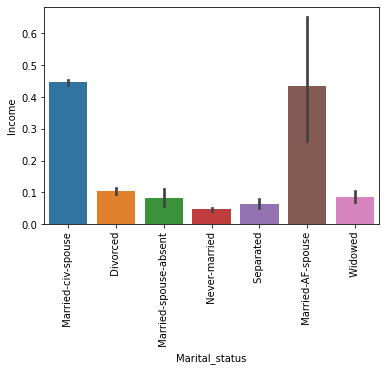

In [28]:
#Checking the realtion b/w martial status and income
sns.barplot(x="Marital_status",y="Income",data=df1)
plt.xticks(rotation=90)

We can observe that married-civ-spouse are earning higher amount of income as compared to others.
Married-AF-spouse are also earning good amount of income, very close to Married-civ-spouse.

In [29]:
df1.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [30]:
#applying Encoding columns in the required independent columns

col2=["Workclass","Education","Marital_status","Occupation","Relationship","Race","Sex","Native_country"]

In [31]:
for j in col2:
    df1[j]=le.fit_transform(df1[j])

# Splitting into X and Y

In [32]:
x=df1.drop("Income",axis=1)
y=df1["Income"]

In [33]:
#Imprting the libarires for sampling
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
smk=SMOTE()
x_new,y_new=smk.fit_resample(x,y)

In [34]:
print(x_new.shape,y_new.shape)

(49438, 14) (49438,)


In [35]:
x=x_new
y=y_new

<AxesSubplot:xlabel='Income', ylabel='count'>

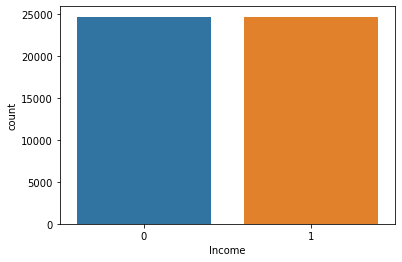

In [36]:
#Checking the distribution in the target column after sampling technique
sns.countplot(y)

Target column is balanced. The dataset is now ready for ML model training.

# Machine Learning Model Training

In [37]:
#Choosing the best random state for our ML Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ",maxAccu," on Random State ",maxRS)

Best Accuracy is  0.7383360302049622  on Random State  30


In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=pd.DataFrame(sc.fit_transform(x_train))
X_test=pd.DataFrame(sc.transform(x_test))

## Saving the best random state and splitting the dataset into training and testing

In [48]:
#Splitting the dataset into training and testing 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=30)

## Creating the Machine Learning model

#### As it is classification type of problem, we will use classification type of Machine learning models here

In [49]:
#taking the Logistic regression model

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7383360302049622
[[5120 2303]
 [1578 5831]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.73      7423
           1       0.72      0.79      0.75      7409

    accuracy                           0.74     14832
   macro avg       0.74      0.74      0.74     14832
weighted avg       0.74      0.74      0.74     14832



In [50]:
#Taking the Random Forest Classifier model

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8924622437971953
[[6632  791]
 [ 804 6605]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7423
           1       0.89      0.89      0.89      7409

    accuracy                           0.89     14832
   macro avg       0.89      0.89      0.89     14832
weighted avg       0.89      0.89      0.89     14832



In [51]:
#Taking the Decicision Tree classififer model

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8544363538295577
[[6309 1114]
 [1045 6364]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      7423
           1       0.85      0.86      0.85      7409

    accuracy                           0.85     14832
   macro avg       0.85      0.85      0.85     14832
weighted avg       0.85      0.85      0.85     14832



In [52]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
print(accuracy_score(y_test,predkn))
print(confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))

0.7188511326860841
[[4943 2480]
 [1690 5719]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.70      7423
           1       0.70      0.77      0.73      7409

    accuracy                           0.72     14832
   macro avg       0.72      0.72      0.72     14832
weighted avg       0.72      0.72      0.72     14832



We can observe from above observation from all the machine learning model that Random Forest Classifier is giving us the best Accuracy score of 89% as compared to other models.

But this might be due to overfitting or underfitting of the dataset in the model. So, for confirmation we will validate all the ML models with the Cross validation score of the all the models.

# Cross - Validation Score

In [53]:
#Checking the cross validation score of Logistic Regresssor model
from sklearn.model_selection import cross_val_score

cvr=cross_val_score(lr,x,y,cv=5)
print("Cross Validation score of Logistic Regression Model: ",cvr.mean())

Cross Validation score of Logistic Regression Model:  0.6753714076671568


In [54]:
#Checking the cross validation score of Random Forest Classifier model

cvr=cross_val_score(rf,x,y,cv=5)
print("Cross Validation score of Random Forest Classifier Model: ",cvr.mean())

Cross Validation score of Random Forest Classifier Model:  0.8845441064939971


In [55]:
#Checking the cross validation score of Decision Tree classifier model

cvr=cross_val_score(dtc,x,y,cv=5)
print("Cross Validation score of Decision Tree Classifier Model: ",cvr.mean())

Cross Validation score of Decision Tree Classifier Model:  0.8464357494542701


In [56]:
#Checking the cross validation score of KNeighbors Classifier model

cvr=cross_val_score(kn,x,y,cv=5)
print("Cross Validation score of KNeighbors Classifier Model: ",cvr.mean())

Cross Validation score of KNeighbors Classifier Model:  0.7295404535654187


Comparing the Scores of the respective Machine lwarning models and cross validation scores, we came to the conclusion as Random Forest Classifier is the best MAchine Learning model as it has the least diffrence between the respective scores.
Randomforest classifier is giving the accuracy of 89%.

# Hyper Paramter tuning

In [57]:
#Importing the GridSearchCV library

from sklearn.model_selection import GridSearchCV

parameters={"criterion":("gini","entropy"), 
            "max_depth":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]}

In [58]:
GCV=GridSearchCV(rf,parameters,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 20}

In [59]:
best_mod=RandomForestClassifier(criterion='entropy',max_depth=20)

best_mod.fit(x_train,y_train)
pred=best_mod.predict(x_test)
print("Best Accuracy Score: ",accuracy_score(y_test,pred)*100)

Best Accuracy Score:  89.29341963322545


# AUC_SCORE

In [60]:
#import the necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_pred_prob=rf.predict_proba(x_test)[:,1]
print(y_pred_prob)

[1.   0.02 0.77 ... 0.7  0.02 0.  ]


In [61]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

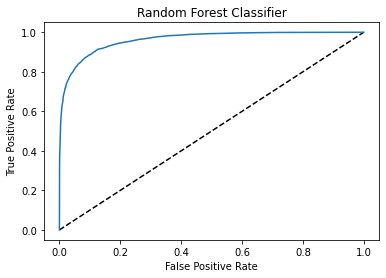

In [62]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logisitic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier")
plt.show()

In [63]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))

In [64]:
print("AUC Score : ",auc_score)

AUC Score :  0.8924613206678683


# Saving the Model

In [65]:
import joblib
joblib.dump(best_mod,"Census Income data.pkl")

['Census Income data.pkl']

In [66]:
#Checking if the model is working
model=joblib.load("Census Income data.pkl")
prediction=model.predict(x_test)
print(accuracy_score(y_test,prediction)*100)

89.29341963322545


The accuracy score around 89% is very accuracy that is considerable but can be increase more, if more data featuring technique applied.